In [24]:
# import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# load the data
df_bitstamp = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
df_coinbase = pd.read_csv('data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [5]:
# inspect the data
print(df_bitstamp.head())
print(df_coinbase.head())

    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           NaN                NaN   
4  1417412220    NaN    NaN    NaN    N

In [6]:
# get the summary info on the data 
df_bitstamp.info()
df_coinbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 266.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [8]:
# get thhe summary statistics
df_bitstamp.describe()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.363457e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06,3.126480e+06
mean,1.456469e+09,3.674656e+03,3.677366e+03,3.671730e+03,3.674595e+03,9.855040e+00,2.884459e+04,3.674570e+03
std,7.573296e+07,3.935578e+03,3.939077e+03,3.931713e+03,3.935490e+03,3.229272e+01,1.010277e+05,3.935458e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.390770e+09,4.100000e+02,4.102400e+02,4.098300e+02,4.100000e+02,3.988120e-01,3.503759e+02,4.099998e+02
50%,1.456610e+09,1.175140e+03,1.175770e+03,1.174825e+03,1.175140e+03,1.990000e+00,2.620491e+03,1.175200e+03
75%,1.522062e+09,6.931175e+03,6.935780e+03,6.926790e+03,6.931225e+03,7.639098e+00,1.760057e+04,6.931180e+03
max,1.587514e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


In [9]:
df_coinbase.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [11]:
# check for the null values
df_bitstamp.isnull().sum()


Timestamp                  0
Open                 1236977
High                 1236977
Low                  1236977
Close                1236977
Volume_(BTC)         1236977
Volume_(Currency)    1236977
Weighted_Price       1236977
dtype: int64

In [12]:
df_coinbase.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [14]:
# fill the missing values with the mean 
df_bitstamp.fillna(df_bitstamp.mean(), inplace=True)
df_coinbase.fillna(df_coinbase.mean(), inplace=True)

In [15]:
df_bitstamp.isnull().sum()


Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [16]:
df_coinbase.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [17]:
# change the timestamp to datetime
df_bitstamp['Timestamp'] = pd.to_datetime(df_bitstamp['Timestamp'], unit='s')
df_coinbase['Timestamp'] = pd.to_datetime(df_coinbase['Timestamp'], unit='s')

In [18]:
df_bitstamp.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

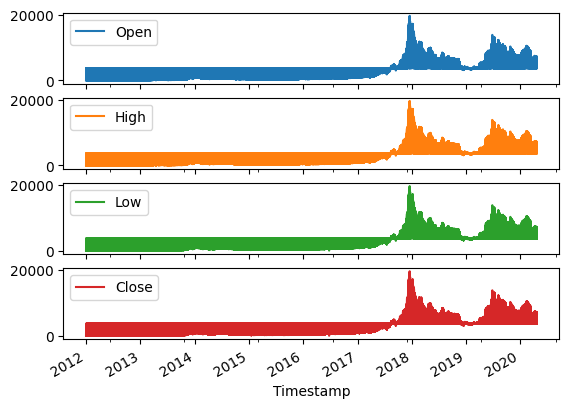

In [22]:
plot_cols = ['Open','High','Low', 'Close']
plot_features = df_bitstamp[plot_cols]
plot_features.index = df_bitstamp['Timestamp']
_ = plot_features.plot(subplots=True)



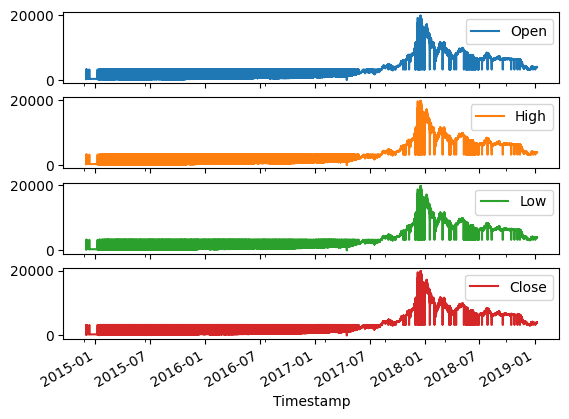

In [23]:
plot_cols = ['Open','High','Low', 'Close']
plot_features = df_coinbase[plot_cols]
plot_features.index = df_coinbase['Timestamp']
_ = plot_features.plot(subplots=True)

In [31]:
# Visualize the dataset
def inspect_and_visualize_data(data):
    # General info and first few rows
    print(data.info())
    print(data.head())

    # Check for missing values
    missing_values = data.isnull().sum()
    print("\nMissing values per column:\n", missing_values)

    # Visualize price trends over time
    data['timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
    plt.figure(figsize=(14, 7))
    plt.plot(data['Timestamp'], data['Close'], label='Close Price')
    plt.title('Bitcoin Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Plot distribution of the close price
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Close'], bins=50, kde=True)
    plt.title('Distribution of Close Prices')
    plt.xlabel('Close Price (USD)')
    plt.show()

    # Visualize the correlation between different features
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Features')
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   timestamp          datetime64[ns]
dtypes: datetime64[ns](2), float64(7)
memory usage: 299.6 MB
None
            Timestamp         Open         High         Low        Close  \
0 2011-12-31 07:52:00     4.390000     4.390000     4.39000     4.390000   
1 2011-12-31 07:53:00  3674.655957  3677.365916  3671.73004  3674.595305   
2 2011-12-31 07:54:00  3674.655957  3677.365916  3671.73004  3674.595305   
3 2011-12-31 07:55:00  3674.655957  3677.365916  3671.73004  3674.595305   
4 2011-12-31 

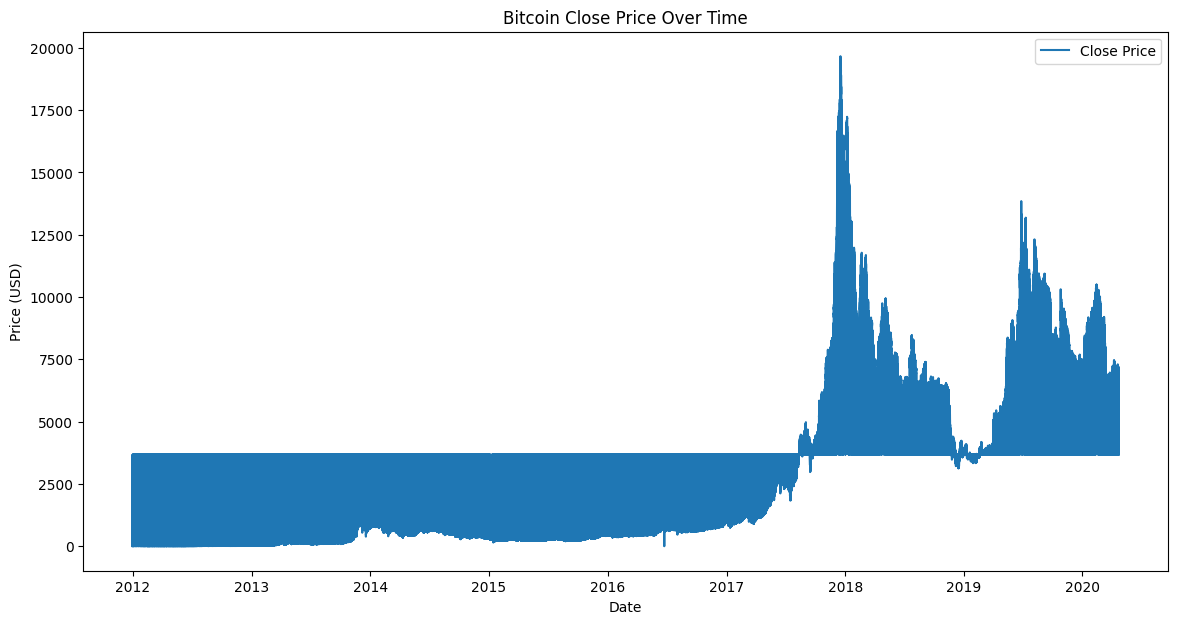

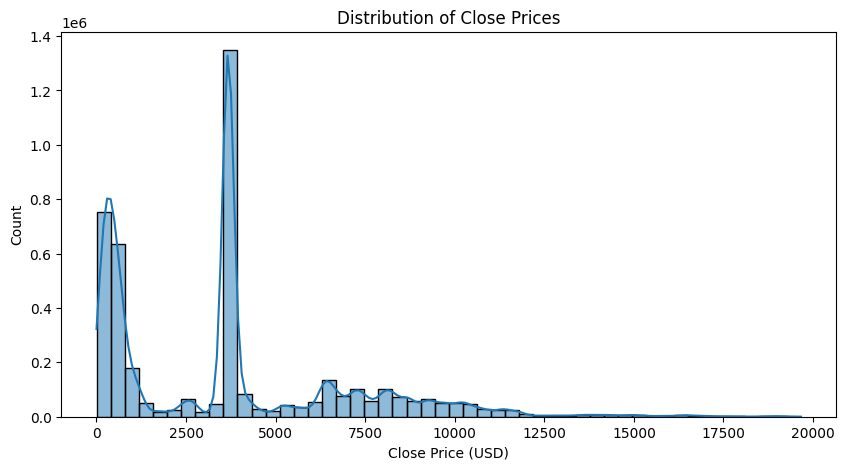

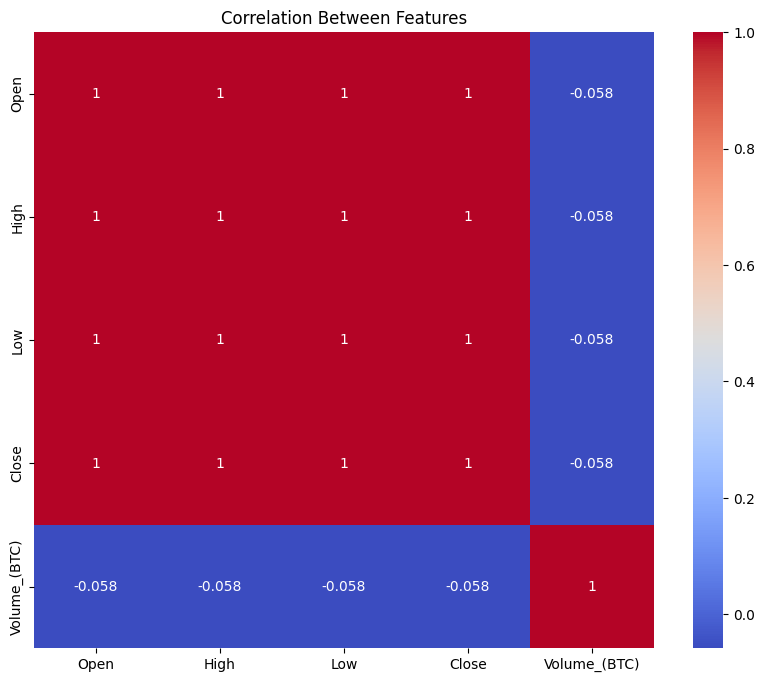

In [32]:
inspect_and_visualize_data(df_bitstamp)